### LENS PHOTOMETRY AFTER GALFIT
__________________________________________________________________________

In [94]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
from matplotlib import ticker
from astropy.nddata.utils import Cutout2D
import astropy.wcs as wcs
from astropy.coordinates import SkyCoord
import astropy.units as u
import os
import warnings
from astropy.visualization import simple_norm
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

In [3]:
# Get some parameters
def getinfo(hdu):
    image = np.array(hdu[0].data)
    header = hdu[0].header
    w_image = wcs.WCS(hdu[0].header)
    return image, header,w_image

In [5]:
# Transform the RA DEC coordinates to XY coordinates
def radec_to_xy(target_radec, w_image):
    c = SkyCoord(target_radec[0], target_radec[1], frame='icrs', unit="deg")
    x, y = w_image.all_world2pix(c.ra,c.dec, 1, quiet=True)
    return x, y

In [8]:
# Paths of the images 
folder_path = "/Users/alexm/OneDrive/Escritorio/CYGWIN_THINGS/LENTE/GL_SDSSJ0819+5356/lens_images"
files_in_folder = os.listdir(folder_path)
print(files_in_folder)
# Filter out files that contain "psf" in their names
filtered_files = [file for file in files_in_folder if "psf2"  in file.lower()]
print((filtered_files))

['find_psf_and_file_txt.ipynb', 'fit.log', 'galfit.01', 'galfit.02', 'galfit.03', 'galfit.04', 'galfit.05', 'galfit.06', 'galfit.07', 'galfit.08', 'galfit.09', 'galfit.10', 'galfit.11', 'galfit.12', 'galfit.13', 'galfit.14', 'galfit.15', 'galfit.16', 'galfit.17', 'galfit.18', 'galfit.19', 'galfit.20', 'galfit.21', 'galfit.22', 'galfit.23', 'galfit.24', 'galfit.25', 'galfit.26', 'galfit.27', 'galfit.28', 'galfit.29', 'galfit.30', 'galfit.31', 'galfit.32', 'galfit.33', 'galfit.34', 'galfit.35', 'galfit.36', 'galfit.37', 'galfit.38', 'galfit.39', 'galfit.40', 'galfit.41', 'galfit.42', 'galfit.43', 'galfit.44', 'galfit.45', 'galfit.46', 'galfit.47', 'galfit.48', 'galfit.49', 'galfit.50', 'galfit.51', 'galfit.52', 'galfit.53', 'galfit.54', 'galfit.55', 'galfit.56', 'galfit.57', 'galfit0.txt', 'galfit1.txt', 'galfit10.txt', 'galfit100.txt', 'galfit101.txt', 'galfit102.txt', 'galfit103.txt', 'galfit104.txt', 'galfit105.txt', 'galfit106.txt', 'galfit107.txt', 'galfit108.txt', 'galfit109.txt', 

##### Aperture Photometry
__________________________________________________________________

OBLINEID 704930
psf2TTT1_iKon936-1_2023-11-16-03-16-49-221884_SDSSJ0819+5356.fits
110 58 58 58 58


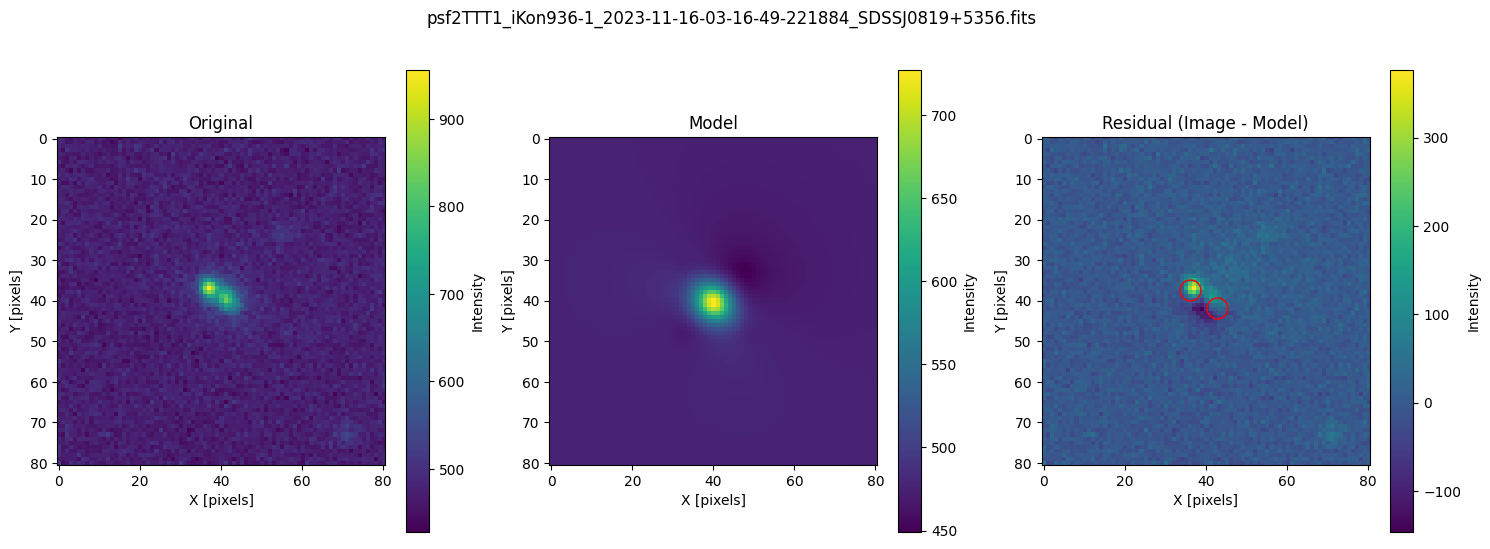

In [90]:
A=[]
B=[]
time=[]
estrelles=[[],[],[],[],[]]
A2=[]
B2=[]
time2=[]
estrella2=[]
count=0
ids=np.array([695780, 695781, 687310, 687312, 687311, 678597, 678599, 676191, 676194, 623324, 623327, 618253, 669449, 666694, 662334, 662335, 662337, 650909, 650910, 650911, 634670, 729129, 729132, 729130, 729131, 726836, 726838, 726837, 724616, 724614, 724617, 723257, 723258, 723256, 723259, 721451, 721448, 721450, 720241, 720240, 720243, 719289, 719290, 719291, 718477, 718478, 718476, 718479, 714130, 714128, 714129, 714131, 712141, 708738, 708737, 708739, 708736, 704930, 704932, 700659, 700661, 699098, 699100, 699101, 699099, 698904, 698903, 685027, 685026, 626497, 659552, 692947, 685028, 664231])
coordsstars = [[125.037078920, 53.968357790], [125.013046340, 53.934497430], [125.010332700, 53.927527680], [125.024931110, 53.921033100], [125.023014140, 53.950554040]] # D, E, G, I, K

# Components coordinates
coordsA=[124.998243440, 53.940423310]#A
coordsB=[125.00007152, 53.93966377] #B ra_decB = w_image.pixel_to_world( xA+3.367/0.507, yA+2.226/0.507)
coordsG=[124.999185780, 53.940057240] #G


for r,j in enumerate(filtered_files):
    try:
        size=50
        with fits.open(j[4:], memmap=True) as hdu0:
            image,  headerorigi, w_image = getinfo(hdu0)
            xG, yG = radec_to_xy(coordsG, w_image)    
            xA, yA = radec_to_xy(coordsA, w_image)
            xB=xA+(3.367/0.507)
            yB=yA+(2.226/0.507)
            xD, yD = radec_to_xy(coordsstars[0], w_image)
            xE, yE = radec_to_xy(coordsstars[1], w_image)
            xG, yG = radec_to_xy(coordsstars[2], w_image)
            xI, yI = radec_to_xy(coordsstars[3], w_image)
            xH, yH = radec_to_xy(coordsstars[4], w_image)
            # image_crop = crop_images(image, x1, y1, size, w_image, header)


        with fits.open("out"+j[4:], memmap=True) as hdu1:
            image1= (hdu1[1].data)
            image2= (hdu1[2].data)
            image3= (hdu1[3].data)
            # x1, y1 = radec_to_xy(coords, w_image)    
            # x2, y2 = radec_to_xy(coords2, w_image)
            # image_crop = crop_images(image, x1, y1, size, w_image, header)
        hdu.close()

        with fits.open(j, memmap=True) as hdu:
            # psf,  header, w_image = getinfo(hdu)
            psf2 = hdu[0].data
            headerpsf2 = hdu[0].header
        
        if r==76:
            if headerorigi["OBLINEID"] in ids:

                print("OBLINEID", headerorigi["OBLINEID"])
            if headerorigi["OBID"] in ids:    
                print("OBID", headerorigi["OBID"])
             
        # # Plot the original image, the model, and the residual
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))
            fig.suptitle(str(j))
            print(str(j))
            im1 = axs[0].imshow(image1, cmap='viridis')
            axs[0].set_title('Original')
            axs[0].set_xlabel('X [pixels]')
            axs[0].set_ylabel('Y [pixels]')
            cbar1 = fig.colorbar(im1, ax=axs[0])
            cbar1.set_label('Intensity')
            # axs[0].set_xlim(  xG+40, xG-40)
            # axs[0].set_ylim(  yG+40, yG-40)

            # Model
            im2 = axs[1].imshow(image2,  cmap='viridis')
            axs[1].set_title('Model')
            axs[1].set_xlabel('X [pixels]')
            axs[1].set_ylabel('Y [pixels]')
            cbar2 = fig.colorbar(im2, ax=axs[1])
            cbar2.set_label('Intensity')

            # Residual
            im3 = axs[2].imshow(image3,  cmap='viridis')
            axs[2].plot(  40-(1.980/0.507), 40-(1.348/0.507), "o", mec="r",  markersize=15, mfc='none')
            axs[2].plot(  40-(1.980/0.507)+(3.367/0.507), 40-(1.348/0.507)+(2.226/0.507), "o", mec="r",  markersize=15, mfc='none')
            axs[2].set_title('Residual (Image - Model)')
            axs[2].set_xlabel('X [pixels]')
            axs[2].set_ylabel('Y [pixels]')
            cbar3 = fig.colorbar(im3, ax=axs[2])
            cbar3.set_label('Intensity')
            
        if headerorigi["OBLINEID"] in ids:

            try:
                positions2 = np.transpose(([40-(1.980/0.507),40-(1.980/0.507)+(3.367/0.507)], [40-(1.348/0.507), 40-(1.348/0.507)+(2.226/0.507)]))
                apertures2 = CircularAperture(positions2, r=3.)
                phot_table2 = aperture_photometry(image3, apertures2)
                # print(phot_table["aperture_sum"][0])
                # plt.plot(image)
                try:
                    # if r==76:
                        # print(phot_table2)
                        # print(phot_table2["aperture_sum"][i])
                    B2.append(phot_table2["aperture_sum"][1])
                    time2.append(headerorigi["JD-OBS"])
                    A2.append(phot_table2["aperture_sum"][0])
                    # B.append(phot_table2["aperture_sum"][1])
                    # time.append(headerorigi["JD-OBS"])
                    # A.append(phot_table2["aperture_sum"][0])
                    # estrella.append(phot_table2["aperture_sum"][0])
                    
                except:
                    continue
                # apertures.plot(color='red', lw=1.5, alpha=0.5)
            except: 
                continue

            try:
                
                mean, median, std = np.mean(image), np.median(image), np.std(image)
                # daofind = DAOStarFinder(fwhm=3.11, threshold=1.*std)
                sources = np.array([[xD,xE,xG,xI,xH],[yD,yE,yG,yI,yH]])
                positions = np.transpose((sources[0], sources[1]))
                # print(positions)
                apertures = CircularAperture(positions, r=5.)
                phot_table = aperture_photometry(image, apertures)
                # print(phot_table)
                try:
                    
                    for i in range(len(coordsstars)):
                        estrelles[i].append(phot_table["aperture_sum"][i])
                        # if i==0 and r==76:
                        #     print(phot_table)
                            # print(phot_table["aperture_sum"][i])
                    
                except:
                    continue
                # apertures.plot(color='red', lw=1.5, alpha=0.5)
            except: 
                continue

            
    except:
        continue
        


    # plt.tight_layout()
    # plt.show()
print(count, len(A2), len(B2), len(time2), len(estrelles[0]))

58


C:\Users\alexm\AppData\Local\Temp\ipykernel_14560\1573664573.py:1: RuntimeWarning: invalid value encountered in log10
  mage=-2.5*np.log10(np.array(A2)/np.array(estrelles[0]))
C:\Users\alexm\AppData\Local\Temp\ipykernel_14560\1573664573.py:3: RuntimeWarning: invalid value encountered in log10
  mage2=-2.5*np.log10(np.array(B2)/np.array(estrelles[0]))


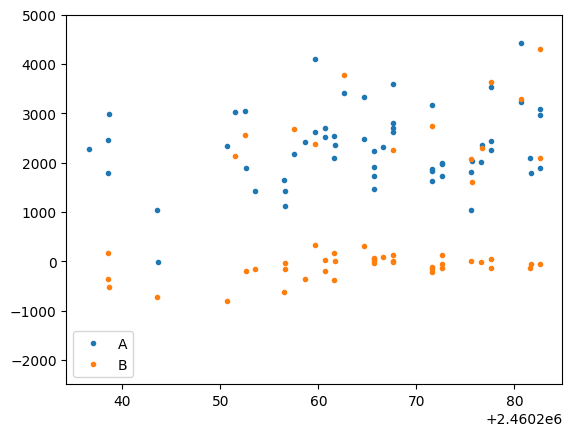

In [87]:
mage=-2.5*np.log10(np.array(A2)/np.array(estrelles[0]))
print(len(mage))
mage2=-2.5*np.log10(np.array(B2)/np.array(estrelles[0]))
mage3=-2.5*np.log10(np.array(estrelles[0])/np.array(estrelles[3]))
mage4=-2.5*np.log10(np.array(estrelles[0])/np.array(estrelles[4]))
plt.plot(time2,A2, ".", label= f"A")
plt.plot(time2,B2, ".", label= f"B")
plt.ylim(top=5000)
# plt.plot(time2,mage3, ".", label= f"σ = {np.std((mage3))}")
# plt.plot(time2,mage4, ".", label= f"σ = {np.std((mage4))}")
plt.legend()